In [1]:
import numpy as np
import scipy as sp
from scipy.stats import unitary_group
from opt_einsum import contract
from qutip import *
from itertools import combinations
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rc
%matplotlib inline
rc('text', usetex=True)
rc('axes', linewidth=3)

In [2]:
def bloch_xyz(inputs):
    # obtain bloch sphere representation vector
    rho = contract('mi,mj->mij', inputs, inputs.conj())
    sigmas = [qutip.sigmax().full(), qutip.sigmay().full(), qutip.sigmaz().full()]
    pos = [np.real(contract('mii->m', contract('mij,jk->mik', rho, x))) for x in sigmas]
    return pos

# Cluster problem

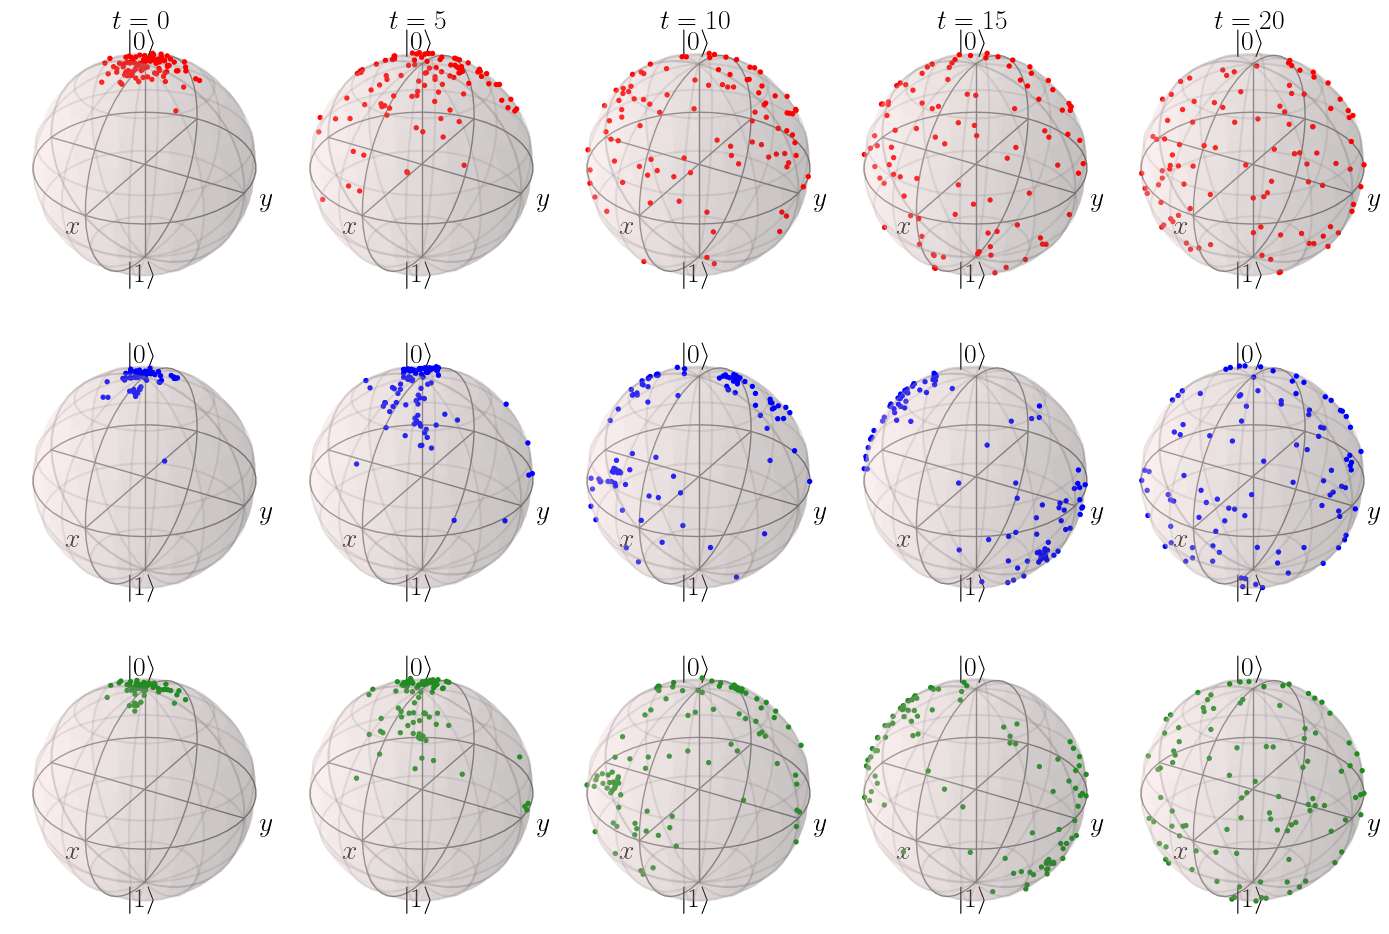

In [3]:
# bloch visualize on the backward denoise process
Ndata = 100
T = 20
indices = np.random.choice(1000, 100, replace=False)
states_diff = np.load('data/cluster/n1/cluster0Diff_n1T20_N1000.npy')[:,indices]
data_gen_tr = np.load('data/cluster/n1/QDDPMcluster0trainGen_n1na1T20L4_mmd.npy')
data_gen_te = np.load('data/cluster/n1/QDDPMcluster0testGen_n1na1T20L4_mmd.npy')

fig, axs = plt.subplots(3,5, figsize=(14,10), subplot_kw={'projection': '3d'})
cc = 0
for i in range(0, T+1, 5):
    xs0, ys0, zs0 = bloch_xyz(states_diff[i])
    xs1, ys1, zs1 = bloch_xyz(data_gen_tr[i])
    xs2, ys2, zs2 = bloch_xyz(data_gen_te[i])
    b0 = qutip.Bloch(fig=fig, axes=axs[0,cc])
    b0.clear()
    b0.add_points([xs0, ys0, zs0])
    b0.point_color = ['r']*Ndata
    b0.point_style = 'm'
    b0.point_size = 8*np.ones(Ndata)
    b0.render()
    b1 = qutip.Bloch(fig=fig, axes=axs[1,cc])
    b1.clear()
    b1.add_points([xs1, ys1, zs1])
    b1.point_color = ['b']*Ndata
    b1.point_style = 'm'
    b1.point_size = 8*np.ones(Ndata)
    b1.render()
    b2 = qutip.Bloch(fig=fig, axes=axs[2,cc])
    b2.clear()
    b2.add_points([xs2, ys2, zs2])
    b2.point_color = ['forestgreen']*Ndata
    b2.point_style = 'm'
    b2.point_size = 8*np.ones(Ndata)
    b2.render()
    axs[0,cc].set_title(r'$t=%d$'%i, fontsize=20)
    cc += 1
plt.tight_layout()

# Circular ensemble

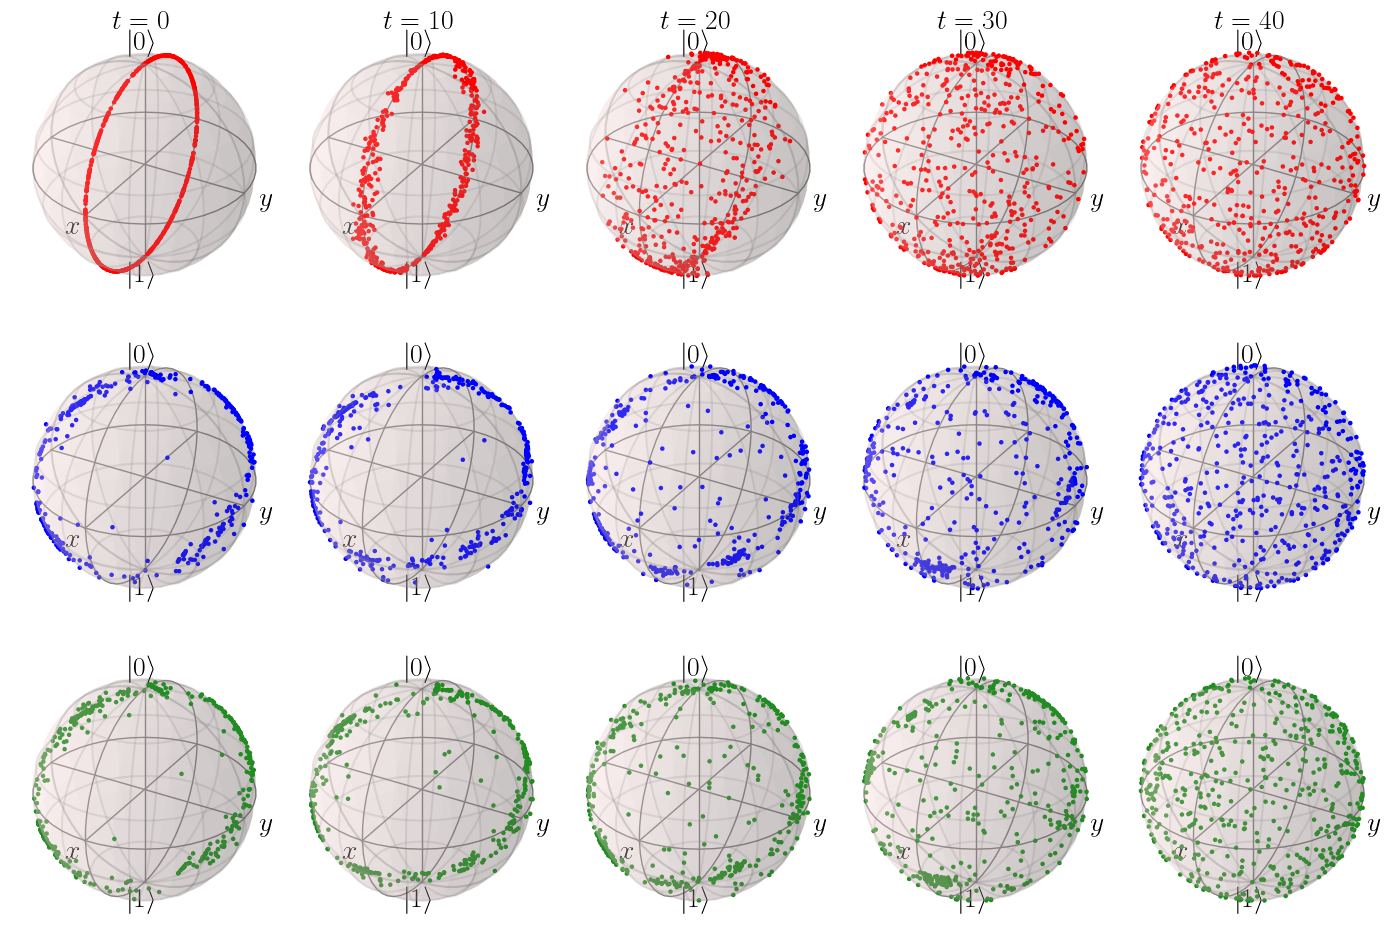

In [4]:
# bloch visualize on the backward denoise process
T = 40
L = 6
Ndata = 500
method = 'wd'
indices = np.random.choice(10*Ndata, Ndata, replace=False)
states_diff = np.load('data/circle/circleYDiff_n1T40_N5000.npy')[:, indices]
data_gen_tr = np.load('data/circle/QDDPMcircleYtraingen_n1na2T40L6_wd.npy')
data_gen_te = np.load('data/circle/QDDPMcircleYtestgen_n1na2T40L6_wd.npy')
fig, axs = plt.subplots(3,5, figsize=(14,10), subplot_kw={'projection': '3d'})

xs, ys, zs = [], [], []
cc = 0
for i in range(0, T+1, 10):
    xs0, ys0, zs0 = bloch_xyz(states_diff[i])
    xs1, ys1, zs1 = bloch_xyz(data_gen_tr[i])
    xs2, ys2, zs2 = bloch_xyz(data_gen_te[i])
    b0 = Bloch(fig=fig, axes=axs[0,cc])
    b0.clear()
    b0.add_points([xs0, ys0, zs0])
    b0.point_color = ['r']*Ndata
    b0.point_style = 'm'
    b0.point_size = 5*np.ones(Ndata)
    b0.render()
    b1 = Bloch(fig=fig, axes=axs[1,cc])
    b1.clear()
    b1.add_points([xs1, ys1, zs1])
    b1.point_color = ['b']*Ndata
    b1.point_style = 'm'
    b1.point_size = 5*np.ones(Ndata)
    b1.render()
    b2 = Bloch(fig=fig, axes=axs[2,cc])
    b2.clear()
    b2.add_points([xs2, ys2, zs2])
    b2.point_color = ['forestgreen']*Ndata
    b2.point_style = 'm'
    b2.point_size = 5*np.ones(Ndata)
    b2.render()
    axs[0,cc].set_title(r'$t=%d$'%i, fontsize=20)
    cc += 1
plt.tight_layout()